In [1]:
#!pip install kaggle

In [2]:
#from google.colab import files
#files.upload()  # Bu komut, kaggle.json dosyasını yüklemenizi sağlar.

In [3]:
#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [61]:
#pip install imbalanced-learn


In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:04<00:00, 22.6MB/s]
100% 66.0M/66.0M [00:04<00:00, 16.8MB/s]


In [6]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# **Introduction**
> Credit Card Fraud Detection, 2013 yılın eylül ayında avrupalı kredi kartı sahiplerinin hesap akışlarını içermektedir. Kredi kartı şirketlerinin, müşterilerden satın almadıkları ürünler için ücret alınmaması için sahte kredi kartı işlemlerini tanıyabilmeleri önemlidir.
Dosyanın içindeki verilerin tanımları:
* V1, V2, V3 ... V28: Veriler gizlenmiştir
* 'Time' : En baştaki aktarım ile mevcut aktarım arasında geçen süre (saniye cinsinden)
* 'Amount': Aktarım yapılan para miktarı
* 'Class': Aktarımın dolancırılık olup olmadığını göstermektedir (1:Dolandırıcılık 0:Dolandırıcılık değil)

Bu yüzden bu data içinde çeşitli yöntemler kullanarak analiz yapılacaktır.

1. **Importing Library**
2. **Data Analysis**
3. **Preprocessing Steps**
4. **Training**





# 1.Importing Library and Load Data

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest,  RandomForestClassifier
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn import datasets, svm, tree, linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score


data = pd.read_csv('creditcard.csv')

# 2. Data Analysis

 > Bu aşamada, veri setindeki tüm değişkenler (sütunlar) detaylı bir şekilde incelenir. Veri tiplerinin doğruluğu kontrol edilir ve verinin genel dağılımı gözlemlenir ve değişkenler arasındaki korelasyonlar değerlendirilir. Bu analiz, veriyi anlamak ve hangi özelliklerin modelleme için önemli olabileceğini belirlemek amacıyla yapılır.

1. **Basic statistical analysis**
2. **Correlation analysis**
3. **Distribution analysis**
4. **Time-based patterns**
5. **Amount-based patterns**
6. **Feature importance analysis**

## 2.1.Basic Static Analysis

In [16]:
data.info() #Verinin genel bir yapısı incelenmiştir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
data.columns #Sütunların bilgisini içerir.

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
data.describe() # Sayısal sütunların istatistiklerini gösterir

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
data.head() #İlk 5 satırı gösterir.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **2.2 Correlation Analysis**

 > ### Correlation analysis, iki değişken arasındaki doğrusal ilişkiyi ölçer, -1 ile 1 arasında bir değer alır.1'e yakın değerlerde pozitif bir ilişki varken yani biri artarken diğeri de artar, -1 yakın değerlerde negatif bir ilişki vardır, 0'a yakın yerlerde ise doğrusal bir ilişki yoktur.


In [20]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


> ### Korelasyon yukarıdaki gibi gösterilebildiği gibi aşağıdaki gibi heatmap fonksiyonu ile de gösterilebilir.

### **Heatmap Gösterimi**

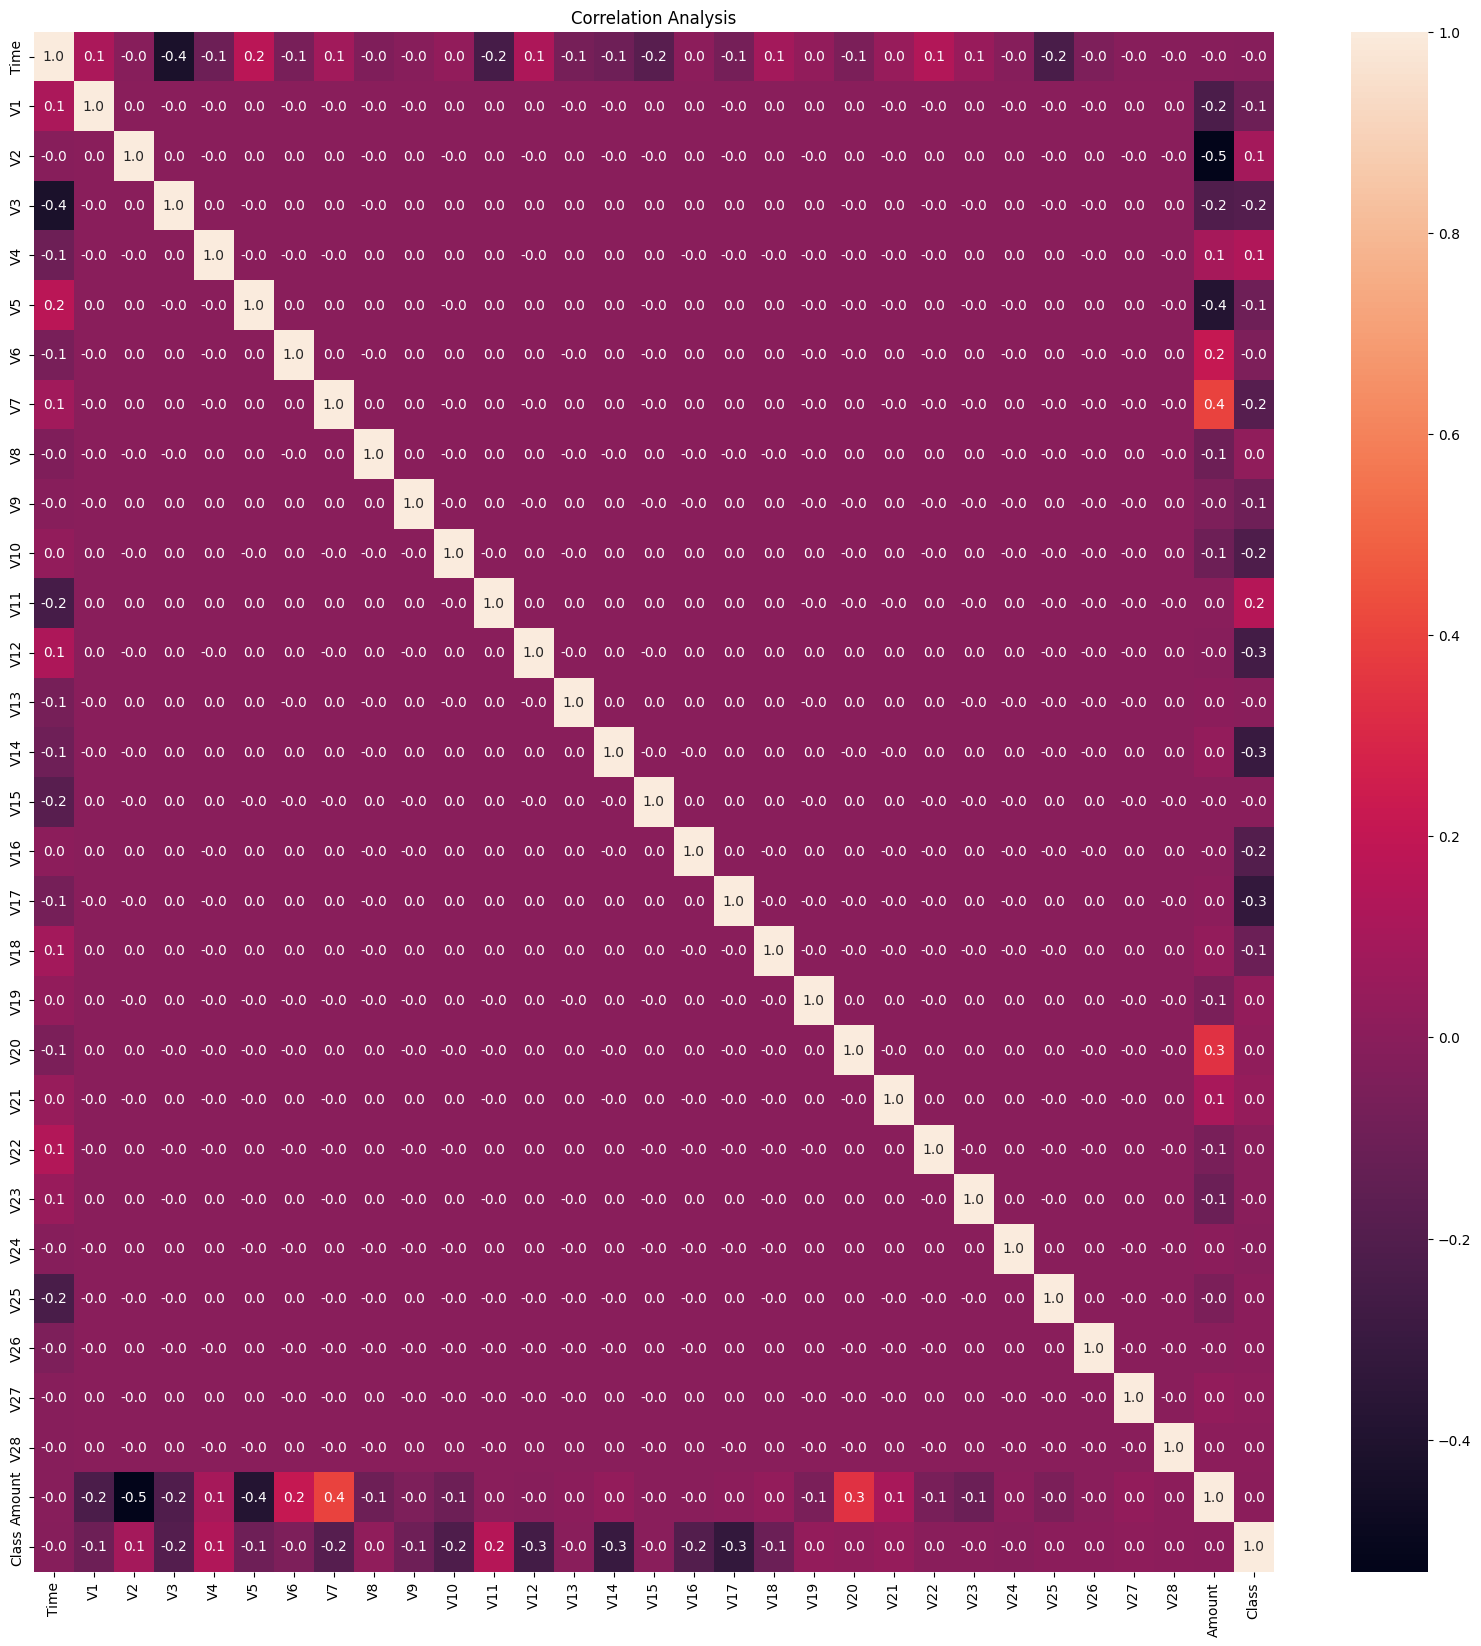

In [62]:
plt.figure(figsize=(20, 20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.1f') #annot=True içindeki koralasyon değerinin yazdırır.
plt.title('Correlation Analysis')
plt.show()

#### **Yukarıdaki grafiğe göre 1 değerine yakın olanlar birbiriyle iyi bir korelasyon içindeyken -0.5 değerine yaklaştıkça negatif bir korelasyona girerler.**

## 2.3 Distribution Analysis

In [22]:
data['Class'].value_counts()   #Hedef class gösterildi. (1 dolandırıcılık işlemi, 0 dolandırıcılık dışı işlem)

,count
Class,
0,284315
1,492


## 2.4 Time-Based Patterns

### Histogram Grafiği ile Gösterme

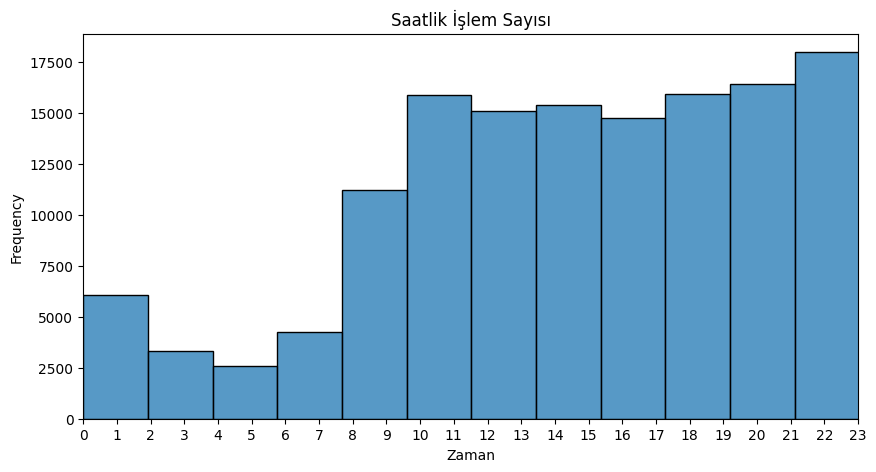

In [76]:
plt.figure(figsize=(10, 5))
data['Time']=data['Time']/3600  # Saniye saate çevrildi.
sns.histplot(data['Time'],bins=25, kde=False)
plt.xticks(np.arange(0, 25, 1))
plt.xlim(0,23)
plt.title('Saatlik İşlem Sayısı')
plt.xlabel('Zaman')
plt.ylabel('Frequency')
plt.show()

### **Histogram grafiği kullanarak 24 saat için işlem grafiği oluşturuldu.**
* Saat 10 ile 15 arasındaki saat dilimlerinde daha fazla işlem yapılmış.
* Gece saatlerinde (0-6 arası) işlem sayısı daha düşük.
* Gün batımından sonra, özellikle akşam saatlerinde (18-22) işlemlerin arttığı görülmektedir.

## 2.5 Amount-Based Patterns

### Boxplot ile Gösterim

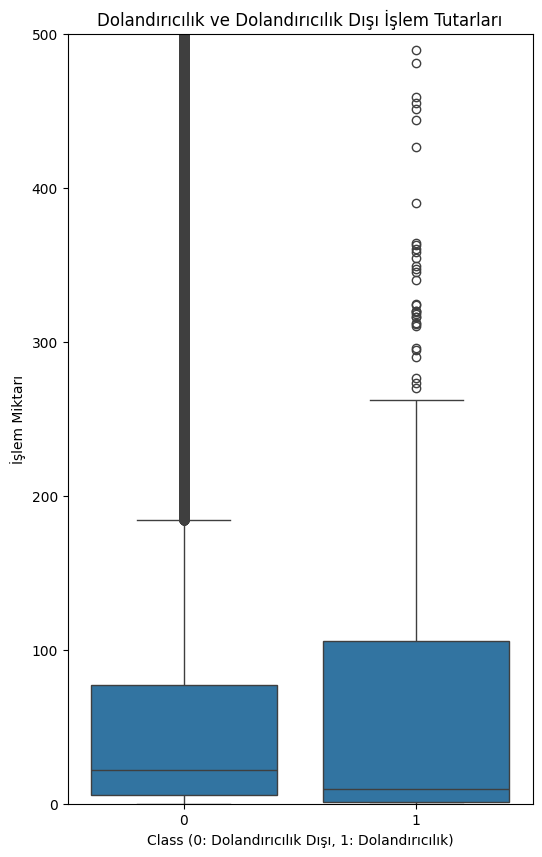

In [84]:
plt.figure(figsize=(6, 10))
sns.boxplot(x=data['Class'], y=data['Amount'])
plt.ylim(0, 500)  # Aşırı büyük işlemleri hariç tutarak görselliği iyileştir.
plt.title("Dolandırıcılık ve Dolandırıcılık Dışı İşlem Tutarları")
plt.xlabel("Class (0: Dolandırıcılık Dışı, 1: Dolandırıcılık)")
plt.ylabel("İşlem Miktarı")
plt.show()

> #### Dolandırıcılık işlemleri daha geniş işlem tutarına sahiptir. Dolandırıcılık dışı işlemlerde aykırı değerler daha dağınıktır.

**Dolandırıcılık Dışı (Class=0):**
Bu sınıftaki işlemlerin genellikle düşük tutarlı olduğu söylenebilir. Bu sınıfın kutu grafiği dar ve çoğunluğu düşük bir değerde yoğunlaşmış.
Aykırı değerler: 500'e kadar bazı işlem tutarları gözlemlenmiştir.

**Dolandırıcılık (Class=1):**
Dolandırıcılık işlemleri genellikle daha büyük tutarlarda yapılmış, ancak bazı çok yüksek işlem tutarları da vardır. Dolandırıcılık işlemlerinde aykırı değerlerin sayısı da daha fazla. Bu da, bazı dolandırıcılık işlemlerinin yüksek tutarlarda olduğunu gösteriyor.
Aykırı değerler: 200-500 aralığında yüksek işlem tutarları bulunuyor, bu da genellikle fraud işlemleri için belirgin.

## 2.6 Feature Importance Analysis

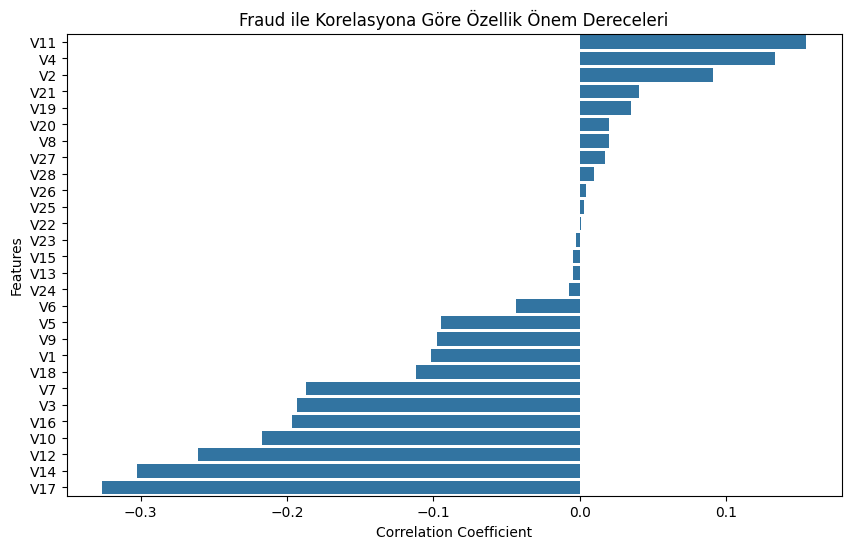

In [87]:
corr_data= data.drop(columns=['Time', 'Amount'])
correlation_matrix = corr_data.corr()
feature_importance = correlation_matrix["Class"].sort_values(ascending=False) #Artan sırada korelasyonu sıralar.
top_features = feature_importance.index[1:] #Class değeri çıkartılıyor.
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[top_features].values, y=top_features)
plt.title("Fraud ile Korelasyona Göre Özellik Önem Dereceleri")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

> ### Pozitif korelasyon (0 ile 1 arasında): Özelliklerin artması ile dolandırıcılık ihtimali de artıyor.
Negatif korelasyon (0 ile -1 arasında): Özelliklerin artması ile dolandırıcılık ihtimali azalıyor.
* ### V4, V2, V21, V19 gibi özellikler, dolandırıcılık ile en güçlü pozitif korelasyona sahip olanlardır. Bu, dolandırıcılık işlemleriyle bu özelliklerin daha fazla ilişkilendirildiğini gösteriyor.
* ### V14, V17, V10 gibi özellikler, daha düşük pozitif korelasyon veya daha zayıf negatif korelasyon gösteriyor.



## 2.7 Pie Chart Yöntemi ile Gösterim

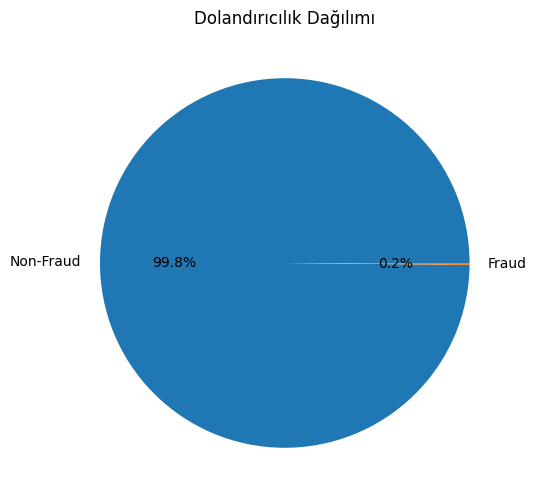

In [28]:
datanew = data['Class'].value_counts()
labels = ['Non-Fraud', 'Fraud']
colors = ['lightblue', 'red']
plt.figure(figsize=(6, 6))
plt.pie(datanew, labels=labels, autopct='%1.1f%%')
plt.title("Dolandırıcılık Dağılımı")
plt.show()


### Pie Chart yönteminde class yoğunluğu gösterildi.

# **3. Preprocessing Steps**
1. Missing value treatment
2. Feature scaling
3. Outlier detection and handling (if necessary)
4. Train-test splitting strategy
5. Cross-validation


## 3.1 Missing Value Treatment**

> ### Hangi sütünlarda boş değerler olduğunu gösteren kod:




In [8]:
data.columns[data.isnull().any()]

Index([], dtype='object')

Aşağıdaki fonksiyonla eksik değerler toplamı gösterildi.




In [9]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


### **İki çıktıya göre hiç boş değer yok. O yüzden eksik değerleri doldurmaya  gerek yoktur.**

## 3.2 Feature Scaling
Feature scaling, veri setindeki değişkenleri belirli bir ölçeğe getirmek için kullanılan bir işlemdir.

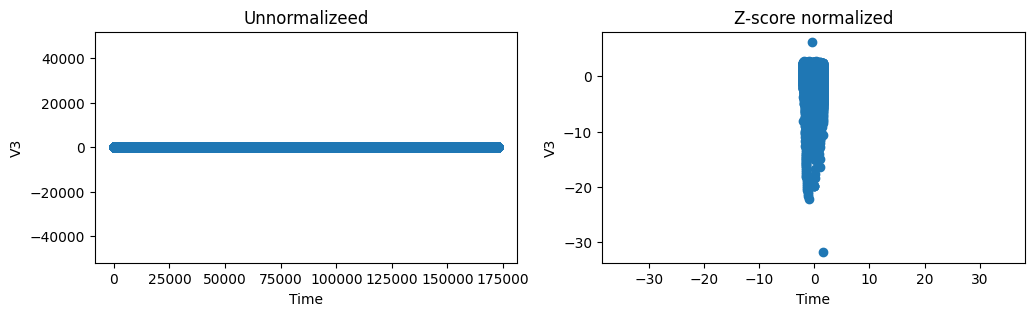

In [107]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0) # Her bir özelliğin ortalama değeri hesaplanır.
    sigma = np.std(X, axis=0) #Standart sapma değeri hesaplanır.
    X_norm = (X - mu) / sigma #Veri 0 ile 1 arasında standart sapmaya getiren dönüşümdür.
    return (X_norm, mu, sigma)

X = data.drop(columns=['Class']).values
X_norm, mu, sigma = zscore_normalize_features(X)

data_scaled = pd.DataFrame(X_norm, columns=data.columns[:-1])
data_scaled['Class'] = data['Class'].values

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(X[:,0], X[:,3])
ax[0].set_xlabel(data.columns[0]); ax[0].set_ylabel(data.columns[3]);
ax[0].set_title("Unnormalizeed")
ax[0].axis('equal')


ax[1].scatter(X_norm[:,0], X_norm[:,3])
ax[1].set_xlabel(data.columns[0]); ax[1].set_ylabel(data.columns[3]);
ax[1].set_title(r"Z-score normalized")
ax[1].axis('equal')

plt.show()

#### **İlk grafik ham veriyi gösterir, son grafik ise Z-score normalizasyonu uygulanmış veriyi gösterir.**
Z-score normalizasyonu, özellikle modelleme sürecinde özelliklerin farklı ölçeklerde olmasının önüne geçilmesi ve aykırı değerlerin daha rahat tespit edilmesi için faydalıdır.
1. İlk grafik:
* Verinin ölçeği büyük ve geniş bir aralıkta dağılmış olan orijinal veriyi gösterir.
2. Son grafik:
* Veri belirli bir aralıkta toplanmış olan z score normalization yöntemi ile standart sapma uğramış halidir.

## 3.3 Train-test Splitting Strategy
Eğitim seti, modeli eğitmek için kullanılan verilerdir ve test seti verileri (modele yeni olan) modelin performansını ve doğruluğunu test etmek için kullanılır.

In [206]:
features = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']
X = data.loc[:, features]
y = data.loc[:, ['Class']]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")   #Sampling techniques

x_train: (227845, 30), x_test: (56962, 30), y_train: (227845, 1), y_test: (56962, 1)


* **X_train: (2277845, 30): Eğitim veri seti 2.277.8455 satır ve 30 sütundan oluşuyor.**
* **X_test: (56962, 30): Test veri seti 56.962 satır ve 30 sütundan oluşuyor.**

### **Standardization Tekniği**
> #### Standartlaştırma, özelliklerin ortalamasını 0 ve standart sapmasını 1 yaparak verileri aynı ölçeğe getirir. Bu işlem, özellikle ölçekleri farklı olan veriler üzerinde çalışırken model performansını artırmak için önemlidir.

In [207]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

#### **SMOTE Tekniği**
#### Bu teknik dengesiz veri setlerinde azınlık sınıfını (minority class) dengelemek için kullanılan bir veri artırma (oversampling) yöntemidir.

In [208]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0) # SMOTE ile veri dengeleme
x_train, y_train = smote.fit_resample(x_train, y_train)

print(f"x_train_smote: {x_train.shape}, y_train_smote: {y_train.shape}")

x_train_smote: (454908, 30), y_train_smote: (454908, 1)


## 3.4 Cross-Validation
Modelin farklı veri bölümlerinde nasıl performans gösterdiğini değerlendirerek aşırı öğrenme (overfitting) ve eksik öğrenme (underfitting) gibi sorunları tespit etmeye yardımcı olur.

### K- Fold Yöntemi

In [114]:
kf = KFold(n_splits=10, shuffle=True, random_state=42) # Veri kümesi 10 eşit parçaya bölündü

Test Split Strategy ve Cross Validation gibi yöntemler overfitting sorunlarını önlemek için kullanılır.

Veri Seti Dengesizliği Neden Bir Sorun Olabilir?
* Dengesiz veri setleri üzerinde eğitilen veriler, genel hatayı en aza indirmek için çoğunluk sınıfını tercih etme eğilimindedir. Bu yüzden, çeşitli hatalara sebep olabilir.
* Dengesiz veri setleri, çoğunluk sınıfında aşırı uyuma yol açabilir ve modelin yeni, görülmemiş verilere genelleme yapma yeteneğini azaltabilir.

Veri Seti Dengesizliğini Aşma Yöntemleri
Yukarıda da yaptığımız missing value treatment,feature scaling,train-test splitting strategy, cross-validation gibi çeşitli yöntemlerle bu sorunlar aşılabilir.

In [122]:
methods = {
    "Technique": [
        "Missing Value Treatment",
        "Feature Scaling",
        "Outlier Detection",
        "Train-Test Splitting",
        "Cross-Validation",
        "Oversampling (SMOTE)",
        "Undersampling",
        "Class Weight Adjustment",
        "Anomaly Detection"
    ],
    "Description": [
        "Eksik verileri doldurma veya kaldırma",
        "Verileri normalize etme veya standardize etme",
        "Aykırı değerleri tespit edip ele alma",
        "Veriyi eğitim ve test setlerine bölme",
        "Modelin genel performansını değerlendirme",
        "Azınlık sınıfından sentetik veri üretme",
        "Çoğunluk sınıfından bazı örnekleri kaldırma",
        "Azınlık sınıfına daha fazla ağırlık verme",
        "Fraud verilerini aykırı değer olarak tespit etme"
    ],
    "Advantages": [
        "Eksik verilerin model performansına etkisini azaltır",
        "Modelin daha iyi öğrenmesini sağlar",
        "Modelin yanlış tahmin yapmasını engeller",
        "Overfitting ve underfitting'i önler",
        "Modelin farklı veri kümelerinde tutarlı çalışmasını sağlar",
        "Daha fazla veri sağlar, azınlık sınıfını artırır",
        "Veriyi küçültüp işlem hızını artırır",
        "Ekstra veri gerektirmez, model ayarlamaları ile çözüm",
        "Çok az fraud verisi bile tespit edilebilir"
    ],
    "Disadvantages": [
        "Yanlış doldurma model hatalarına yol açabilir",
        "Yanlış ölçekleme, modelin performansını düşürebilir",
        "Aykırı değerlerin yanlış ele alınması bilgi kaybına neden olabilir",
        "Yanlış bölme modelin yanlış tahmin yapmasına neden olabilir",
        "Yanlış çapraz doğrulama, hatalı genelleştirmeye neden olabilir",
        "Yanlış sentetik veri üretimi, modelin doğruluğunu düşürebilir",
        "Veri kaybına yol açabilir, azınlık sınıfını küçültebilir",
        "Hassas model seçiminde başarısız olabilir",
        "Karmaşıklık artar, yanlış pozitif tahminler olabilir"
    ]
}

methods_df = pd.DataFrame(methods)
from IPython.display import display
display(methods_df)


,Technique,Description,Advantages,Disadvantages
0,Missing Value Treatment,Eksik verileri doldurma veya kaldırma,Eksik verilerin model performansına etkisini a...,Yanlış doldurma model hatalarına yol açabilir
1,Feature Scaling,Verileri normalize etme veya standardize etme,Modelin daha iyi öğrenmesini sağlar,"Yanlış ölçekleme, modelin performansını düşüre..."
2,Outlier Detection,Aykırı değerleri tespit edip ele alma,Modelin yanlış tahmin yapmasını engeller,Aykırı değerlerin yanlış ele alınması bilgi ka...
3,Train-Test Splitting,Veriyi eğitim ve test setlerine bölme,Overfitting ve underfitting'i önler,Yanlış bölme modelin yanlış tahmin yapmasına n...
4,Cross-Validation,Modelin genel performansını değerlendirme,Modelin farklı veri kümelerinde tutarlı çalışm...,"Yanlış çapraz doğrulama, hatalı genelleştirmey..."
5,Oversampling (SMOTE),Azınlık sınıfından sentetik veri üretme,"Daha fazla veri sağlar, azınlık sınıfını artırır","Yanlış sentetik veri üretimi, modelin doğruluğ..."
6,Undersampling,Çoğunluk sınıfından bazı örnekleri kaldırma,Veriyi küçültüp işlem hızını artırır,"Veri kaybına yol açabilir, azınlık sınıfını kü..."
7,Class Weight Adjustment,Azınlık sınıfına daha fazla ağırlık verme,"Ekstra veri gerektirmez, model ayarlamaları il...",Hassas model seçiminde başarısız olabilir
8,Anomaly Detection,Fraud verilerini aykırı değer olarak tespit etme,Çok az fraud verisi bile tespit edilebilir,"Karmaşıklık artar, yanlış pozitif tahminler ol..."


No charts were generated by quickchart


### Hierarchical Clustering
Veri noktalarını bir hiyerarşi (ağaç yapısı) oluşturacak şekilde gruplara ayıran bir kümeleme (clustering) yöntemidir. Bu yöntem, veri noktalarını birbirine benzerliklerine göre kümeler ve bu kümeleri hiyerarşik bir yapıda organize eder.

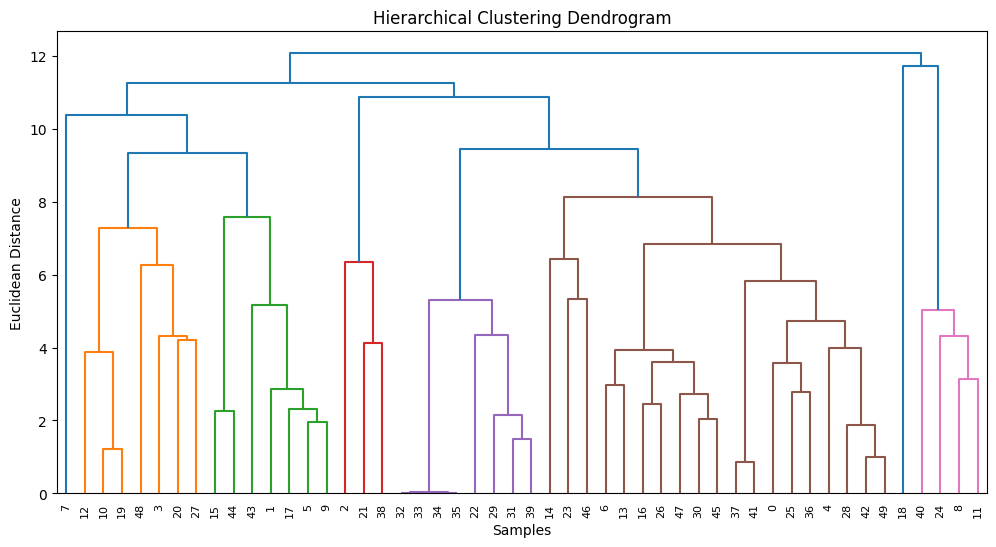

In [200]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled[:50], method='ward')) #veri setinin ilk 50 özelliğini alındı.
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


Samples verideki V7, V12 gibi ifade eder. Mesafe ise verilerin birbirinden uzaklığını temsil eder.  Düşük mesafeler benzer örnekleri, yüksek mesafeler ise farklı örnekleri temsil ediyor.

In [266]:
f1 = f1_score(y_test, y_ran)
print(f1)

0.8656716417910447


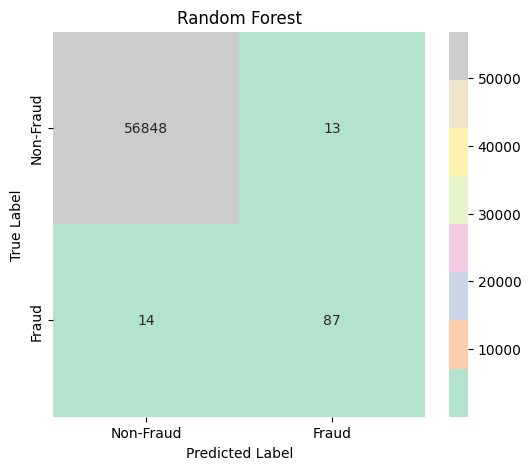

In [165]:
y_ran = rf.predict(x_test)
cm = confusion_matrix(y_test, y_ran)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Pastel2", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest")
plt.show()

# **4. Training**
>### Bu bölümde hazırlanan veri seti kullanarak birkaç model eğitilecek ve karşılaştırmaları yapılacaktır.Birkaç eğitim tekniği kullanılarak eğitim teknikleri ile bilgi edineceğiz.

## **4.1 Supervised Learning**
   #### Etiketli veriler kullanılarak eğitilir, yani giriş verileri doğru çıktıyla etiketlenir. Bu algoritmaların amacı, girdilerden çıktılara bir eşleme öğrenmek ve böylece yeni veriler için çıktıyı tahmin etmektir.

## 4.1.1 **Lineer Regression**
 > ### Veri kümesindeki gözlenen hedefler ile doğrusal yaklaşımla öngörülen hedefler arasındaki kareler toplamının artık değerini en aza indirmek için katsayıları w = (w1, …, wp) olan doğrusal bir modele uyar.



In [174]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)

LinearRegression()

In [262]:
y_pred_prob = Linear_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

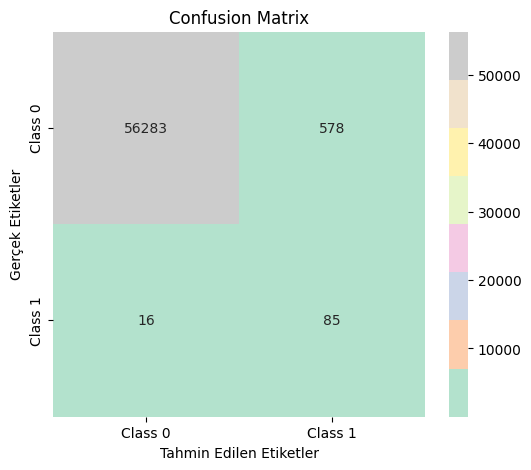

In [263]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()

In [265]:
f1 = f1_score(y_test, y_pred)

results.append({"F1 Score": f1})

results_df = pd.DataFrame(results)
print(f1)


0.22251308900523561


#### Verilen çıktıya göre, çoğunlukla Class 0 üzerinde çok doğru tahminler yapmış, ancak Class 1  üzerinde bazı hatalar yapmış.
#### Class 0 için doğru tahmin oranı çok yüksek, ancak Class 1'de yanlış sınıflandırmalar daha fazla olmuş.
#### Özellikle 85 false positive ve 16 false negative değeri, modelin Class 1'i doğru tahmin etmede zorlandığını gösteriyor.
 #Genel olarak doğruluk oranı yüksek ama Class 1 için modeli iyileştirmek gerekebilir.

## **4.1.2 Logistic Regression**

>* Verinin belirli bir sınıfa ait olup olmadığını tahmin etmek olduğu
sınıflandırma görevleri için kullanılan bir gözetimli makine öğrenme algoritmasıdır.
>* Lojistik regresyon , girdileri bağımsız değişkenler olarak alan ve 0 ile 1 arasında bir olasılık değeri üreten sigmoid fonksiyonunu için kullanılan ikili sınıflandırma için kullanılır.

In [173]:
Logistic_model= LogisticRegression(max_iter=5000)
Logistic_model.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

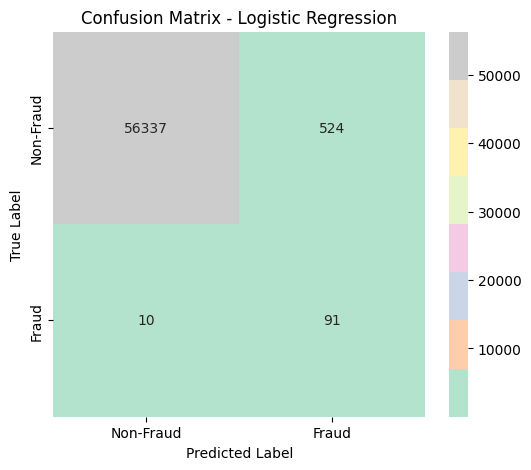

In [240]:
y_pred = Logistic_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Pastel2", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [242]:
f1 = f1_score(y_test, y_pred)
results.append({"F1 Score": f1})
results_df = pd.DataFrame(results)
print(f1)

0.2541899441340782


> #### **Linear Regression ile Logistic Regression Arasındaki Fark**
Doğrusal Regresyon sürekli sonuçları tahmin etmek için kullanılırken, Lojistik Regresyon bir gözlemin belirli bir kategoriye girme olasılığını tahmin etmek için kullanılır. Lojistik Regresyon, tahmin edilen değerleri 0 ile 1 arasında eşleştirmek için S şeklinde bir lojistik fonksiyon kullanır.



## 4.1.3 Decision Tree
#### Karar ağacı, bir problemi çözmek için farklı seçeneklerin grafiksel bir gösterimidir ve farklı faktörlerin nasıl ilişkili olduğunu gösterir.
#### Bu karar ağacı modelinde, dolandırıcılık (Fraud) işlemlerini tahmin etmek için bir dizi özellik (feature) kullanılmıştır. Ağaç, V14 gibi özelliklerin belirli eşik değerlerine dayalı olarak veriyi ayırır. Ağaçtaki düğümler, her bir özelliği kullanarak en doğru sınıfı (Fraud veya Non-Fraud) belirlemeye çalışır.

In [260]:
dt_model = DecisionTreeClassifier(max_depth=4,random_state=0)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


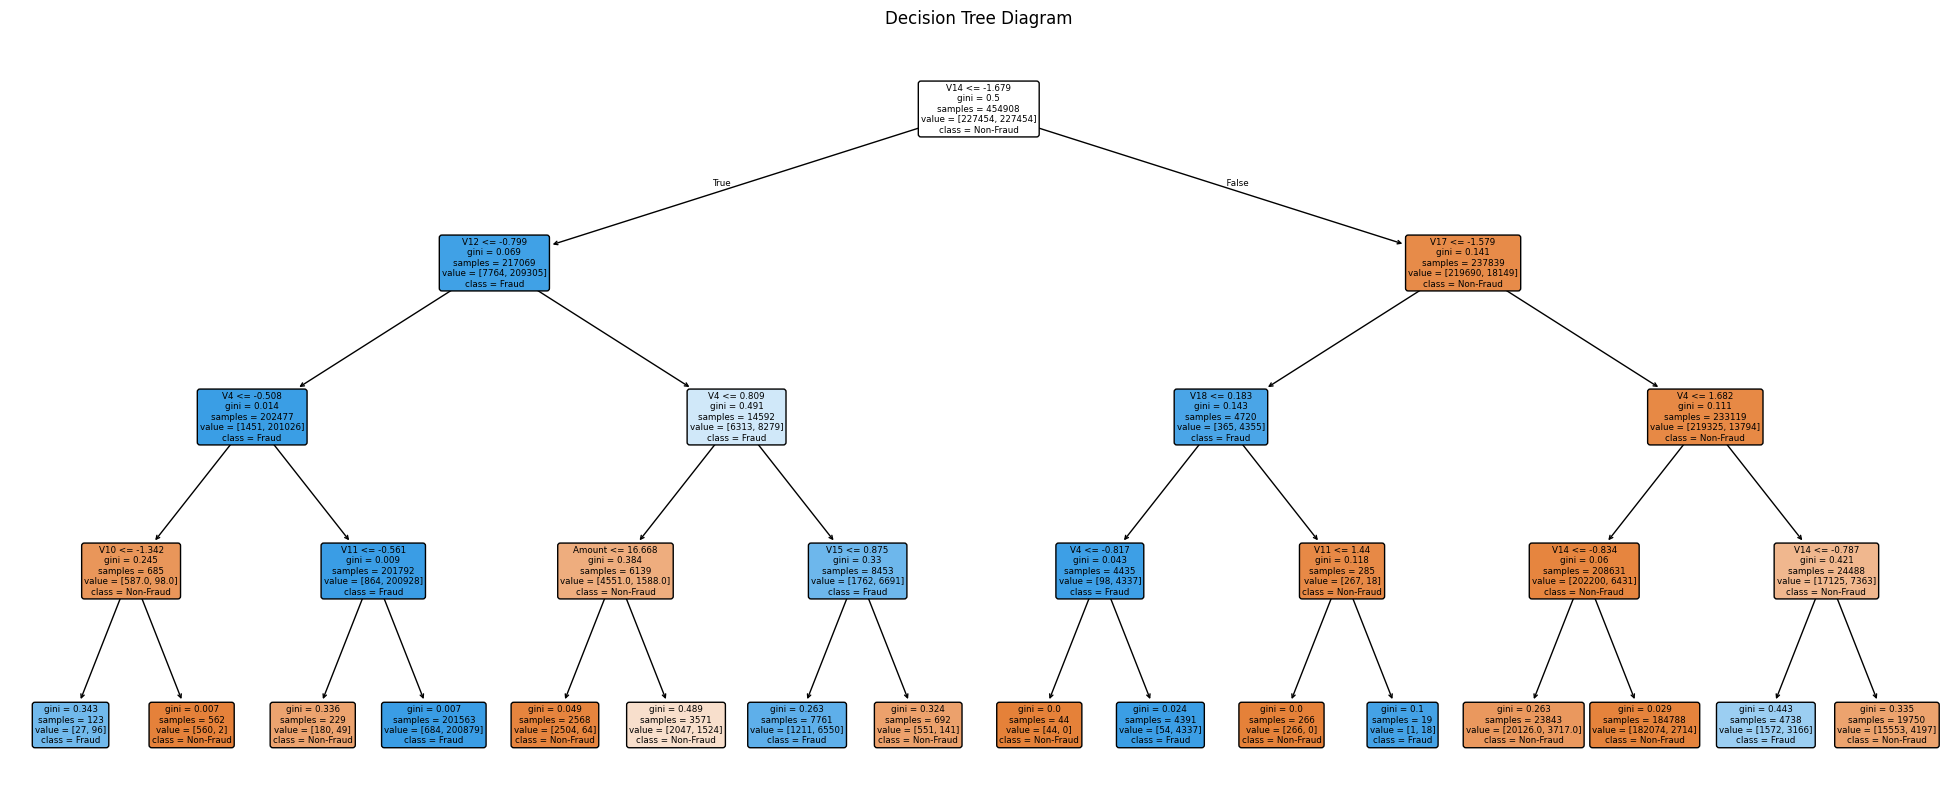

In [163]:
plt.figure(figsize=(25,10))
plot_tree(dt_model, feature_names=x_train.columns, class_names=["Non-Fraud", "Fraud"], filled=True, rounded=True)
plt.title("Decision Tree Diagram")
plt.show()
#gini: düğümdeki veri karışıklığını ifade eder.

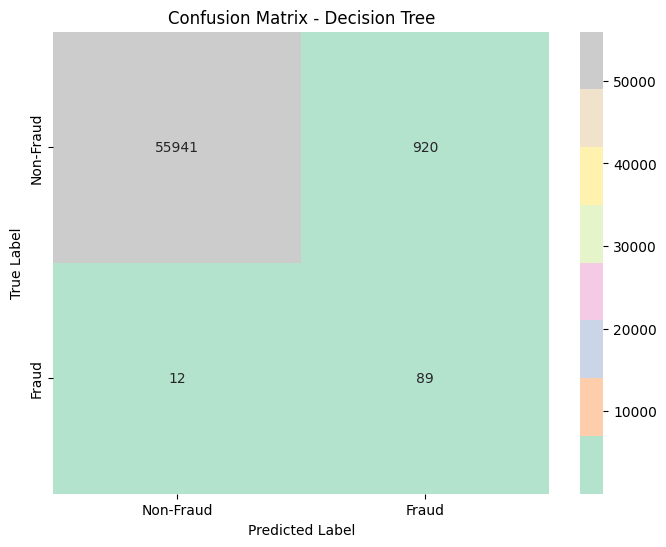

In [158]:
y_pred = dt_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [259]:
f1 = f1_score(y_test, y_pred)

results.append({"F1 Score": f1})

results_df = pd.DataFrame(results)

# Grafik çizme
print(f1)

0.19098712446351931


* #### Kredi kartı dolandırıcılığı tespitinde hangi özelliklerin (V17, V12, V4 vb.) daha belirleyici olduğunu gösteriyor.
* #### Mavi düğümler dolandırıcılık işlemlerini (Fraud), turuncu düğümler ise normal işlemleri (Non-Fraud) temsil eder. Derin dallar, modelin fazla öğrenmiş (overfitting) olabileceğini gösterebilir.

## **4.1.4 Random Forest Algorithm**
> ### Makine Öğrenmesinde tahminler yapmak için güçlü bir ağaç öğrenme tekniğidir ve daha sonra tahmin yapmak için tüm ağaçların oylamasını yapılır . Sınıflandırma ve regresyon görevi için yaygın olarak kullanılırlar.

In [164]:
np.random.seed(42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

## 4.1.5 Support Vector Machines (SVM)

>Temel amacı, veri noktalarını en iyi şekilde ayıran bir karar sınırı (hyperplane) bulmaktır.
> **Veri Analizi:**Veriler alınır ve iki sınıf (örneğin, dolandırıcılık ve dolandırıcılık dışı işlemler) arasındaki farkı belirlemek için bir model kurulur.

> **Hiper Düzlemin Bulunması:**Bu algoritma, iki sınıfı en iyi şekilde ayıran hiper düzlemi bulmaya çalışır. Sınıflar arasındaki en geniş marjini bulur.

> **Destek Vektörleri ile Öğrenme:**Destek vektörleri, bu ayrımı sağlayan veri noktalarıdır ve bu noktalar, modelin doğruluğunu belirler.

> **Karar Verme:**Yeni bir veri noktası geldiğinde, SVM bu noktayı, en yakın hiper düzleme göre doğru sınıfa yerleştirir.

In [213]:
from sklearn.svm import SVC, LinearSVC

svm_model = LinearSVC(max_iter=10000)
svm_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(max_iter=10000)

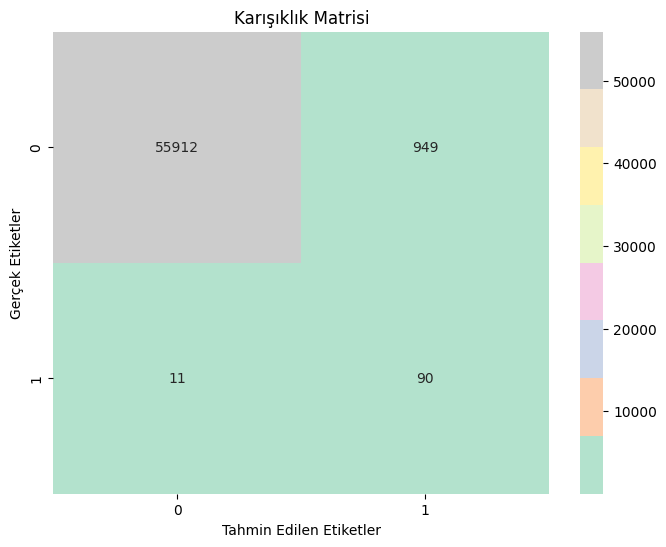

In [216]:
y_pred1 = svm_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel2', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()

In [217]:
f1 = f1_score(y_test, y_pred1)
print(f1)

0.15789473684210525


## 4.1.6 XGBoost

> XGBoost, gradient boosting'in bir uzantısıdır. Gradient boosting, zayıf modelleri (genellikle karar ağaçları) ardışık olarak eğitir ve her adımda önceki modellerin hatalarını düzeltmeye çalışır.



In [279]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

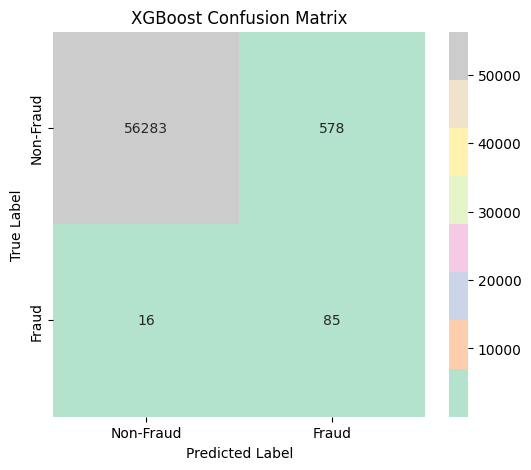

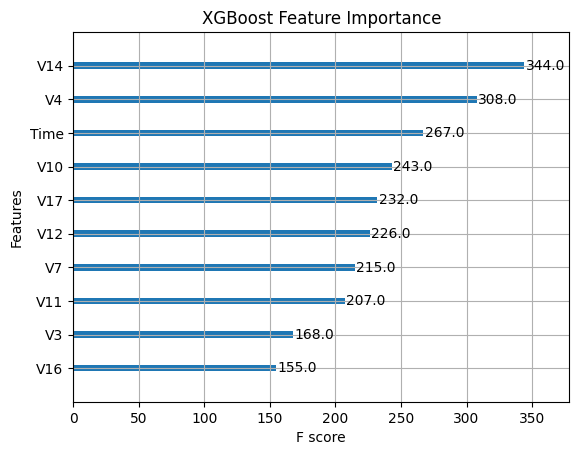

In [280]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Pastel2", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()

xgb.plot_importance(xgb_model, max_num_features=10, importance_type="weight")
plt.title("XGBoost Feature Importance")
plt.show()

 * 56,855 Normal İşlem (Non-Fraud) doğru tahmin edildi.
 * 82 Fraud İşlem doğru tahmin edildi (model bunları yakalayabildi).
 * 19 Fraud İşlem yanlış tahmin edildi (Model bunları fraud olarak algılamadı – hatalı negatif).
 * 6 Normal İşlem hatalı olarak fraud tahmin edildi (hatalı pozitif – yanlış alarm).

In [281]:
y_pred = xgb_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)


0.7058823529411765


# 4.1.7 K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN), denetimli öğrenme algoritmalarından biridir ve genellikle sınıflandırma ve regresyon problemleri için kullanılır. KNN, basit ama etkili bir algoritma olup, veri noktalarının birbirlerine olan benzerliklerine dayanarak tahminlerde bulunur.

In [210]:
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier(n_neighbors=2)

pipeline = make_pipeline(StandardScaler(), knn)

accuracies = cross_val_score(pipeline, X, y, cv=kf, n_jobs=-1)  # n_jobs=-1 tüm çekirdekleri kullanır

for accuracy in accuracies:
    print(f"Accuracy: {accuracy:.4f}")

print(f"Average Accuracy: {np.mean(accuracies):.4f}")

Accuracy: 0.9995
Accuracy: 0.9994
Accuracy: 0.9997
Accuracy: 0.9995
Accuracy: 0.9994
Accuracy: 0.9995
Accuracy: 0.9996
Accuracy: 0.9996
Accuracy: 0.9996
Accuracy: 0.9995
Average Accuracy: 0.9995


# 4.2 Unsupervised Learning

>* Etiketli veri yoktur. Model, yalnızca girdilerle çalışır ve kendi içinde gruplamalar yapar.
* Genellikle büyük ve karmaşık veri setlerinde kullanılır.
* Önceden tanımlanmış bir doğru-yanlış ölçütü yoktur, model veri içindeki benzerlikleri ve yapıları bulmaya çalışır.

## 4.2.1 Clustering

### K - Means Clustering
Verileri benzerliklerine göre gruplara ayırmak için kullanılan bir tekniktir . Önce bazı merkez noktaları seçerek her veri en yakın merkeze atanmasıyla çalışır. Tüm noktalar bir kümeye atandıktan sonra, merkezler her kümedeki noktaların ortalama konumu bulunarak güncellenir. Bu işlem, merkezler kümeler oluşturmayı bırakana kadar tekrarlanır.

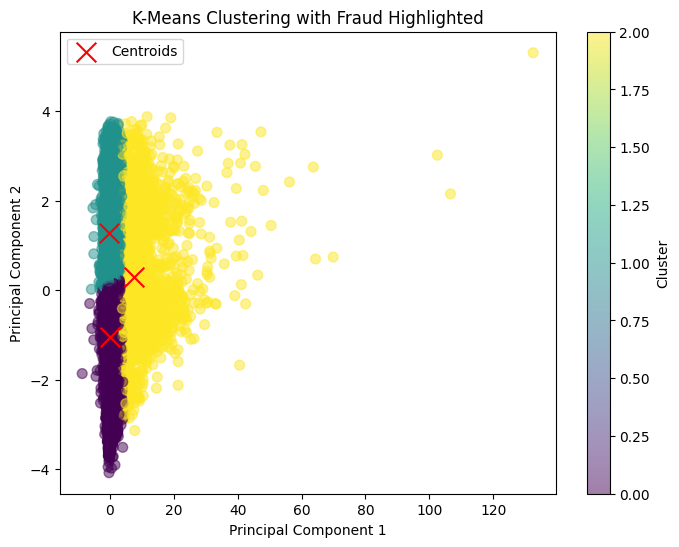

In [286]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(scatter, label="Cluster")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with Fraud Highlighted")
plt.legend()
plt.show()

V1, V2 gibi 3 verinin kümeleme algoritmasıyla Fraud oranıdır.

### F1 Score yöntemiyle ML algoritmalarını test ettiğimizde Random Forest yönteminin en yüksek olduğu görülüyor. O yüzden veri için bu yöntemi kullanmak doğru seçenek olacaktır.